# Importing libraries and loading the dataset

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Faculty_Attrition_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   faculty_id                 15200 non-null  int64  
 1   academic_rank              15200 non-null  object 
 2   tenure_status              15200 non-null  object 
 3   years_at_institution       15200 non-null  int64  
 4   base_salary                14793 non-null  float64
 5   teaching_load              15200 non-null  int64  
 6   research_funding           14897 non-null  float64
 7   institution_type           15200 non-null  object 
 8   department_size            15200 non-null  int64  
 9   admin_support              15200 non-null  int64  
 10  work_life_balance          15200 non-null  int64  
 11  promotion_opportunities    15200 non-null  int64  
 12  publications_last_3_years  15200 non-null  int64  
 13  student_evaluation_avg     15200 non-null  flo

# Missing value analysis

Missing Value Count per Feature:
base_salary                  407
research_funding             303
faculty_id                     0
tenure_status                  0
academic_rank                  0
years_at_institution           0
teaching_load                  0
institution_type               0
department_size                0
admin_support                  0
work_life_balance              0
promotion_opportunities        0
publications_last_3_years      0
student_evaluation_avg         0
left_institution               0
dtype: int64


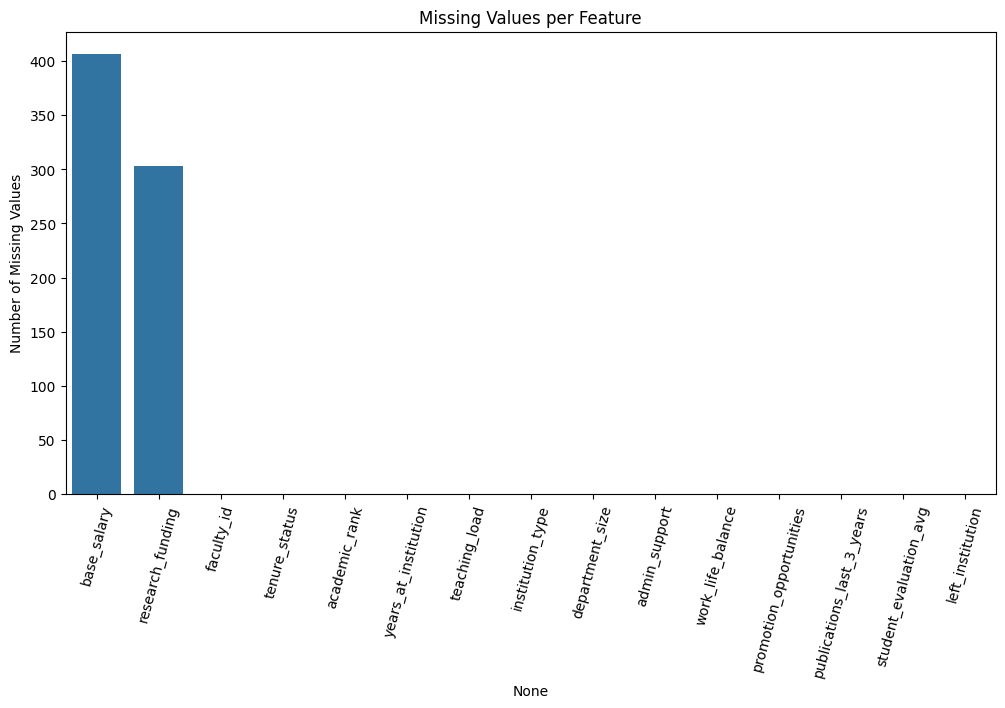

In [8]:

missing_counts = df.isnull().sum().sort_values(ascending=False)

print("Missing Value Count per Feature:")
print(missing_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=75)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Feature")
plt.show()

# Unique values per feature

In [9]:
unique_counts = df.nunique().sort_values(ascending=False)
print("\nUnique values per feature:")
print(unique_counts)



Unique values per feature:
faculty_id                   15000
student_evaluation_avg       15000
research_funding             14702
base_salary                  14606
department_size                 45
years_at_institution            31
publications_last_3_years       14
promotion_opportunities          9
work_life_balance                9
teaching_load                    9
admin_support                    9
institution_type                 4
academic_rank                    4
tenure_status                    3
left_institution                 2
dtype: int64


# Summary statistics for numerical columns

In [10]:
numeric_summary = df.describe().T
numeric_summary


,count,mean,std,min,25%,50%,75%,max
faculty_id,15200.0,17506.417434,4328.065334,10000.000000,13761.750000,17513.500000,21254.250000,24999.000000
years_at_institution,15200.0,15.223684,8.915639,0.000000,7.000000,15.000000,23.000000,30.000000
base_salary,14793.0,72828.024670,29426.188620,3018.252354,60109.990664,70136.781363,80241.634552,455160.358533
teaching_load,15200.0,5.011908,2.583163,1.000000,3.000000,5.000000,7.000000,9.000000
research_funding,14897.0,31471.447572,27160.168032,-142595.936679,16502.735598,29871.432199,43815.315576,387886.159875
department_size,15200.0,26.882500,12.970742,5.000000,16.000000,27.000000,38.000000,49.000000
admin_support,15200.0,4.997500,2.573914,1.000000,3.000000,5.000000,7.000000,9.000000
work_life_balance,15200.0,4.962566,2.585592,1.000000,3.000000,5.000000,7.000000,9.000000
promotion_opportunities,15200.0,5.012171,2.583671,1.000000,3.000000,5.000000,7.000000,9.000000
publications_last_3_years,15200.0,4.021184,1.998571,0.000000,3.000000,4.000000,5.000000,13.000000


# Summary table for categorical columns

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

cat_summary = df[categorical_cols].describe().T
cat_summary


,count,unique,top,freq
academic_rank,15200,4,Lecturer,3873
tenure_status,15200,3,Tenure-Track,7663
institution_type,15200,4,Technical Institute,3849


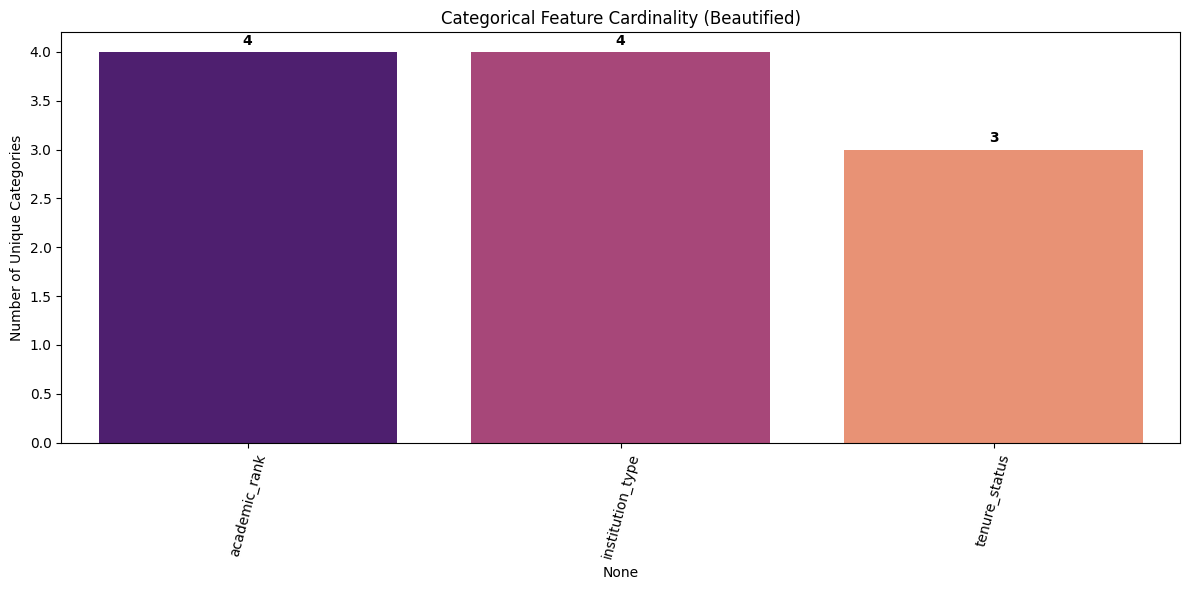

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
cat_unique = df[categorical_cols].nunique().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x=cat_unique.index,
    y=cat_unique.values,
    hue=cat_unique.index,
    legend=False,
    palette="magma"
)

# Add labels above bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold'
    )

plt.xticks(rotation=75)
plt.ylabel("Number of Unique Categories")
plt.title("Categorical Feature Cardinality (Beautified)")
plt.tight_layout()
plt.show()


# Distribution analysis

# Numerical features visualization

In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols


Index(['faculty_id', 'years_at_institution', 'base_salary', 'teaching_load',
       'research_funding', 'department_size', 'admin_support',
       'work_life_balance', 'promotion_opportunities',
       'publications_last_3_years', 'student_evaluation_avg',
       'left_institution'],
      dtype='object')

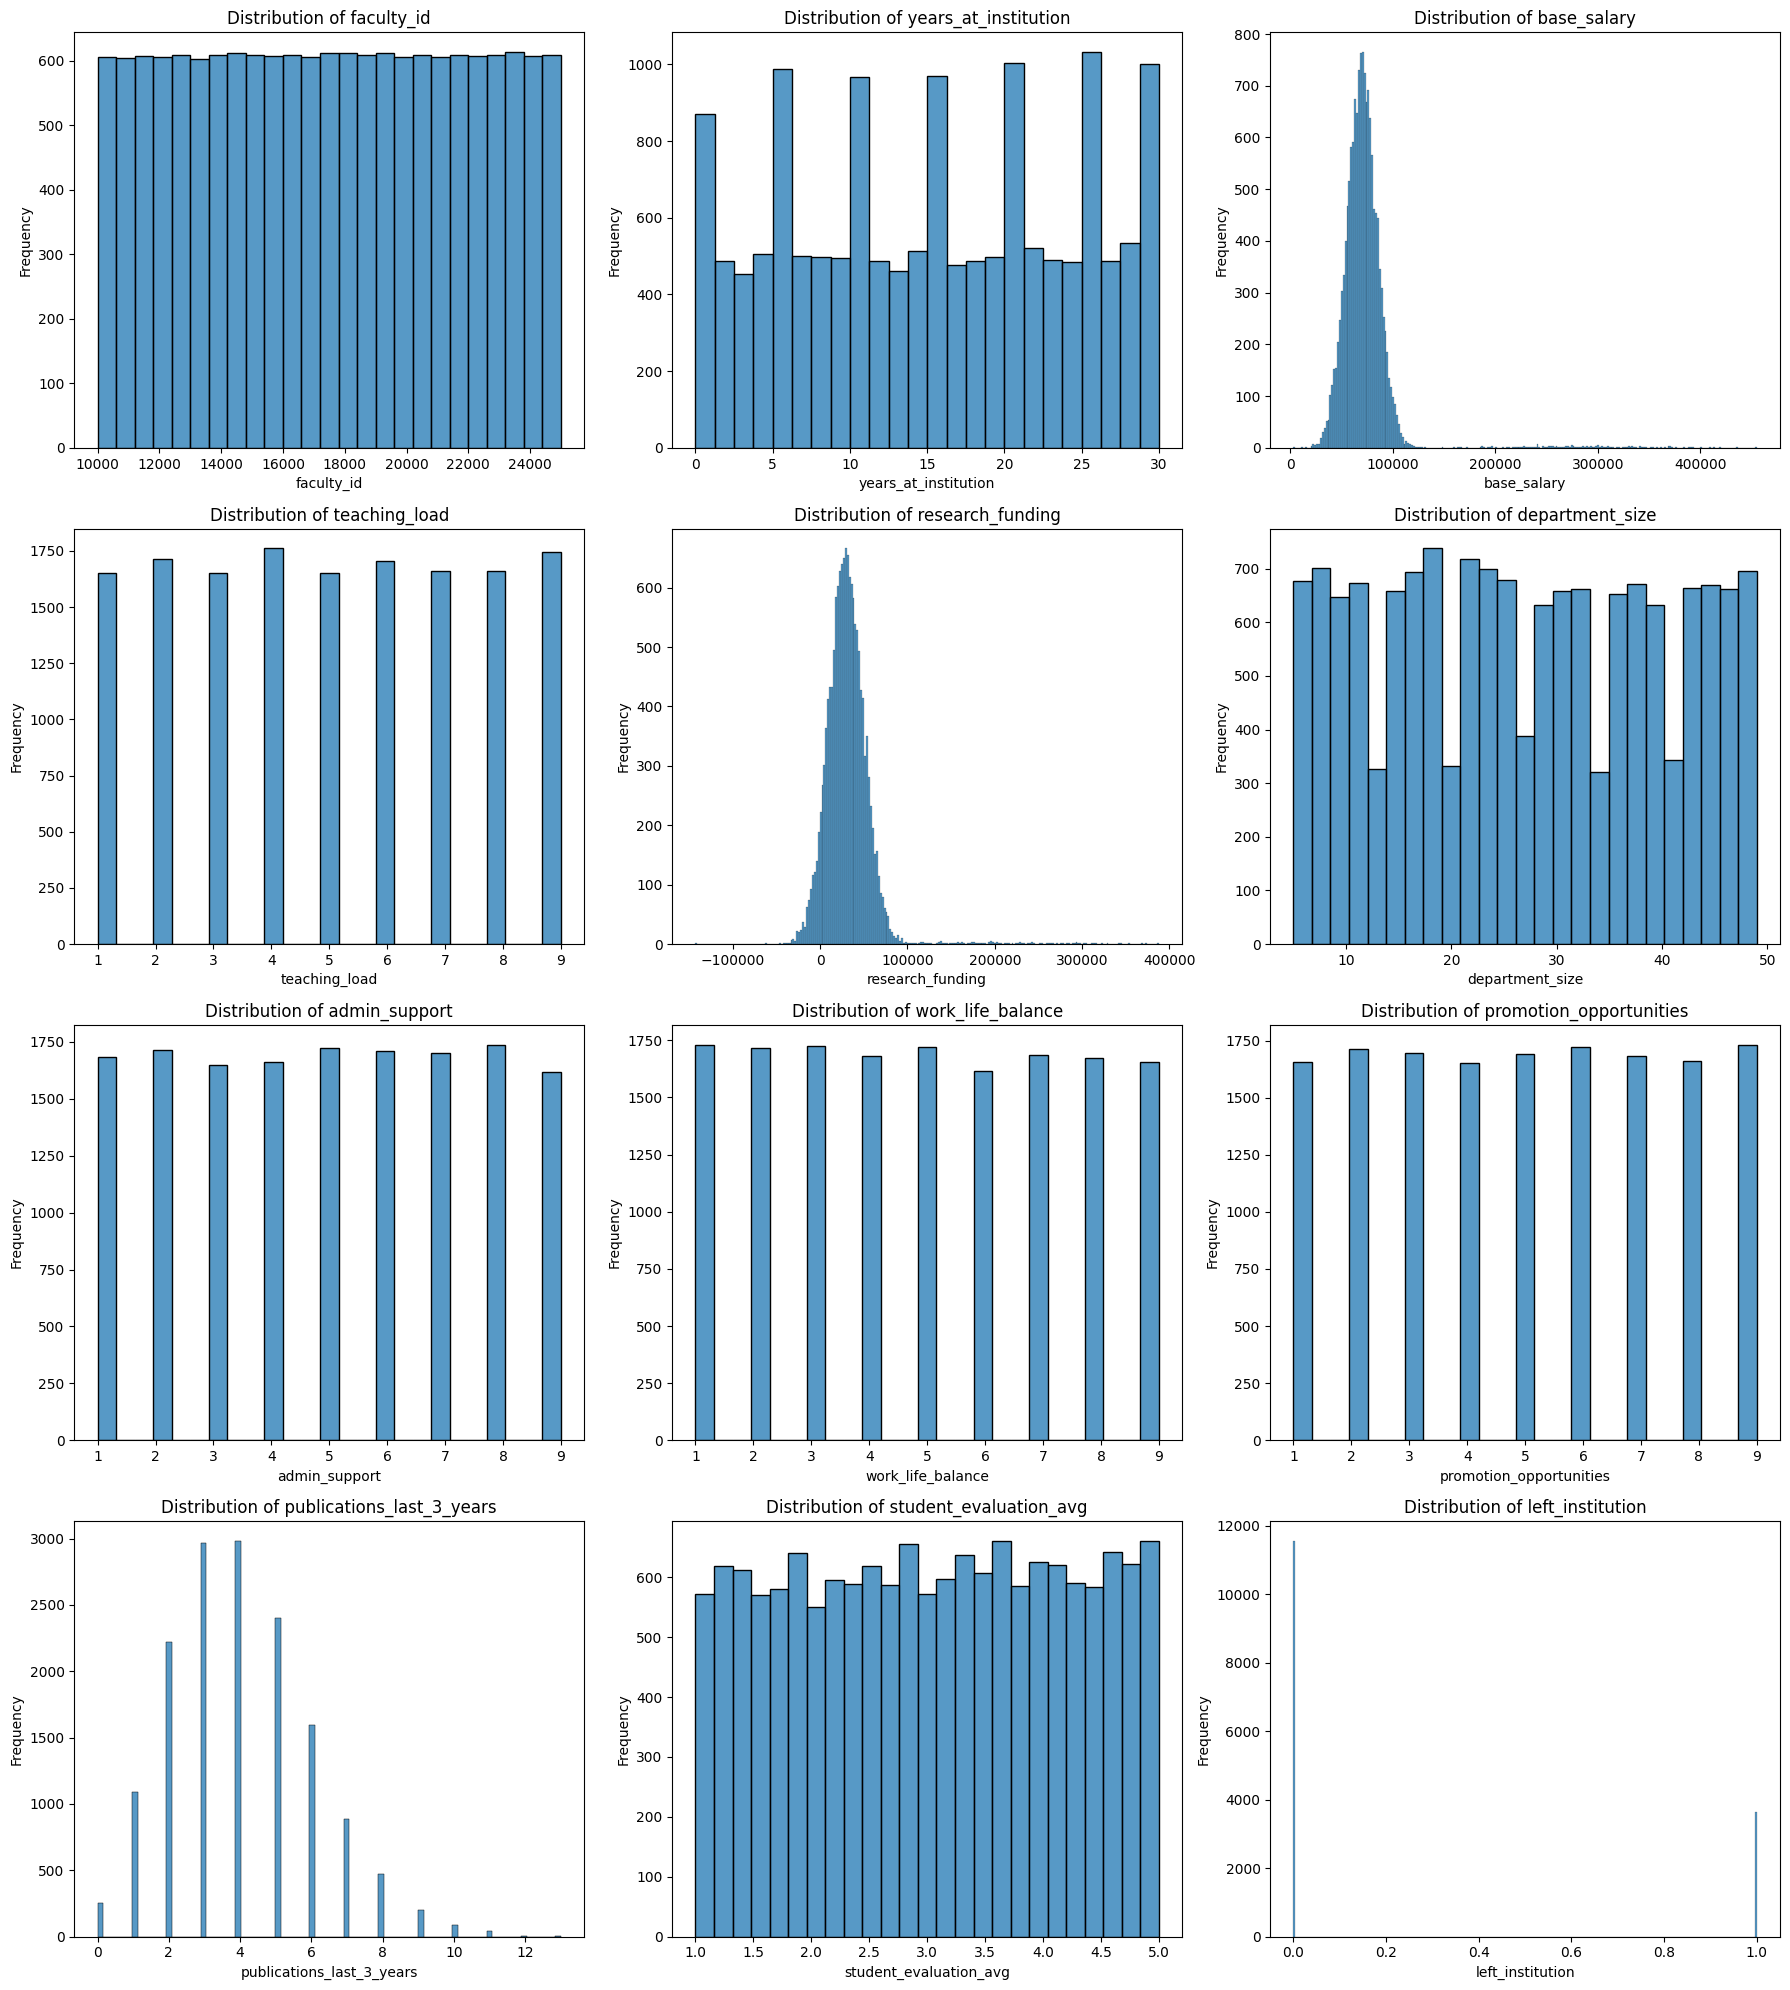

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_cols = numeric_cols
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # No KDE for any column
    sns.histplot(df[col], kde=False, bins='auto')
    
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Categorical feature visualization

In [16]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols


Index(['academic_rank', 'tenure_status', 'institution_type'], dtype='object')

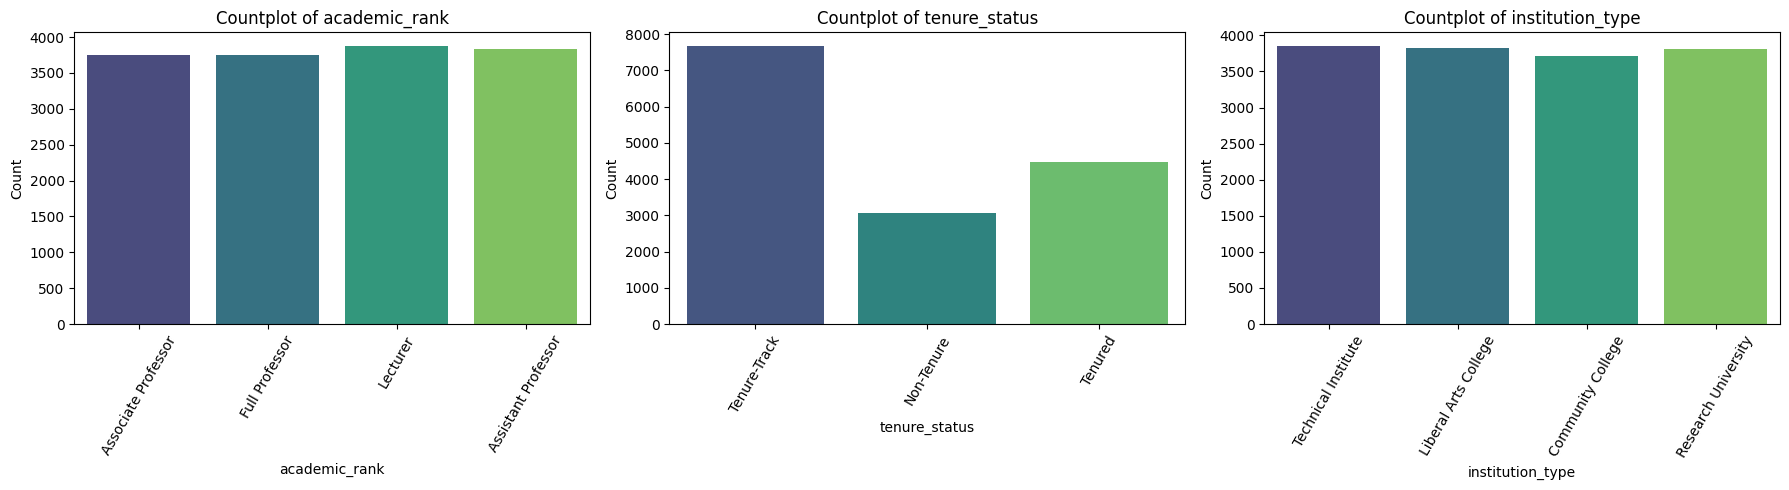

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cat_cols = categorical_cols
n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.countplot(data=df, x=col, hue=col, legend=False, palette="viridis")
    
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=60)
    plt.ylabel("Count")
    
plt.tight_layout()
plt.show()


# Outlier analysis

# Using boxplots 

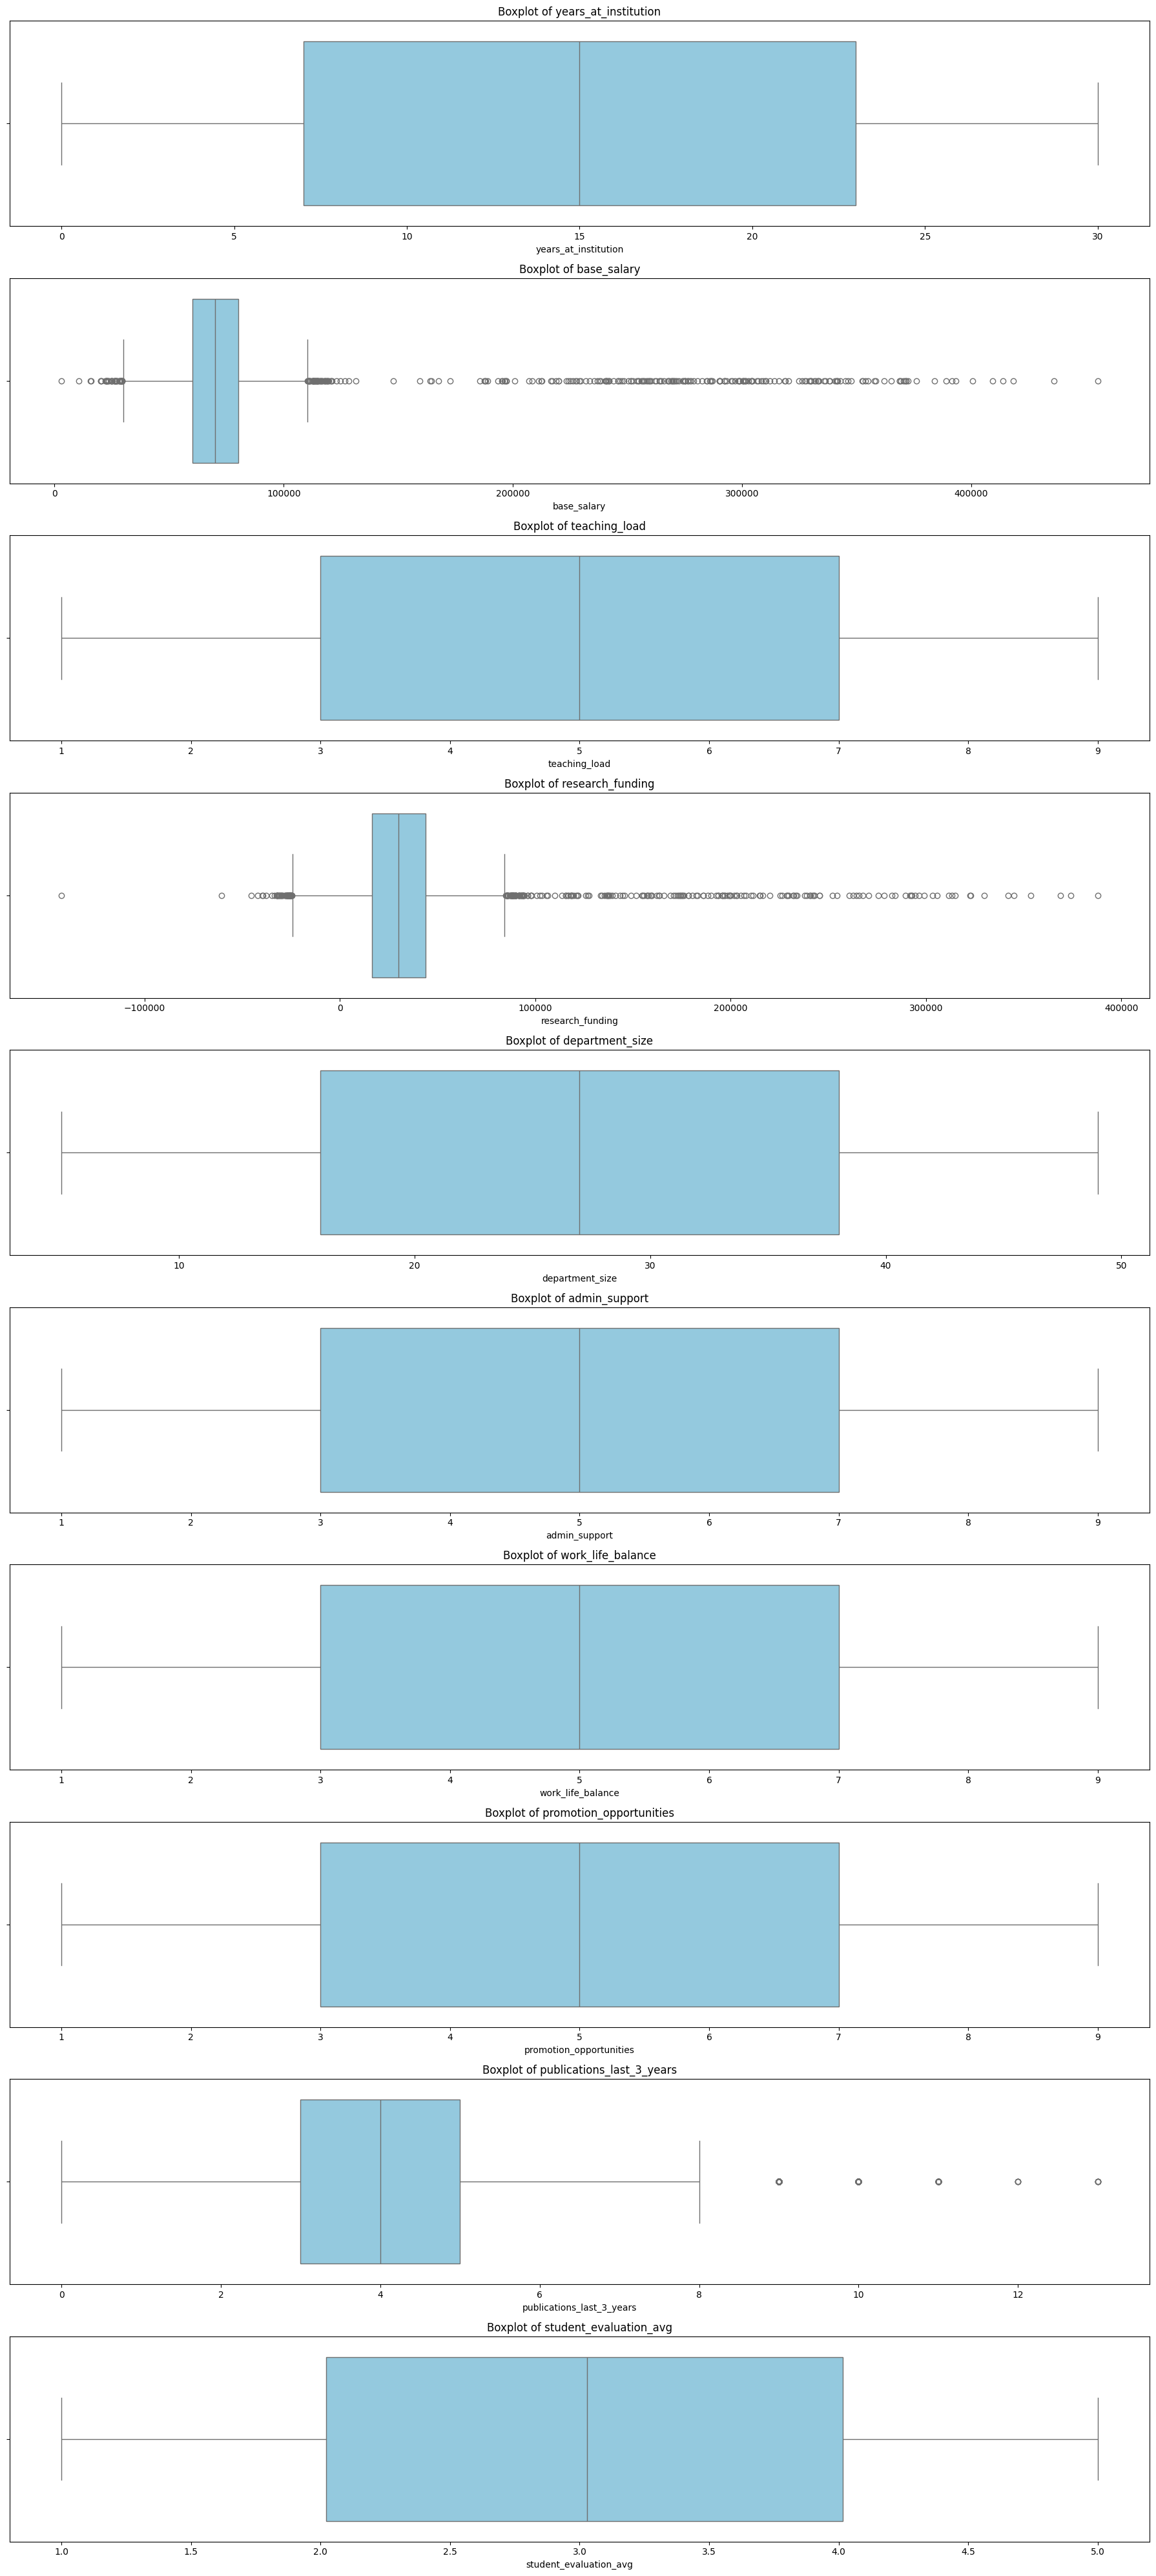

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['left_institution', 'faculty_id']]

plt.figure(figsize=(18, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()


# Detecting outliers per feature using IQR method

In [19]:
import pandas as pd

def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((df[col] < lower) | (df[col] > upper)).sum()

outlier_counts = {col: detect_outliers(col) for col in numeric_cols}
pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])


,Outlier Count
years_at_institution,0
base_salary,294
teaching_load,0
research_funding,257
department_size,0
admin_support,0
work_life_balance,0
promotion_opportunities,0
publications_last_3_years,335
student_evaluation_avg,0
